In [1]:
#Helper libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as trf
import tensorflow as tf

2024-06-18 03:51:52.406200: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-18 03:51:52.408694: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-18 03:51:52.460523: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-18 03:51:52.461886: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-18 03:51:53.410521: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

give path of the file


In [2]:
csvPath = '/home/hpcap/Desktop/modules/Ai/Data/wine.csv'

data_df = pd.read_csv(csvPath,header=None)
data_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    float64
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    int64  
 5   5       178 non-null    float64
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    int64  
 13  13      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
1,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
2,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
3,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
4,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
5,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
6,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
7,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
8,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
9,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [5]:
for col in data_df.columns:
    print (f'{col}' , data_df[col].unique())

0 [14.23 13.2  13.16 14.37 13.24 14.2  14.39 14.06 14.83 13.86 14.1  14.12
 13.75 14.75 14.38 13.63 14.3  13.83 14.19 13.64 12.93 13.71 12.85 13.5
 13.05 13.39 13.3  13.87 14.02 13.73 13.58 13.68 13.76 13.51 13.48 13.28
 13.07 14.22 13.56 13.41 13.88 14.21 13.9  13.94 13.82 13.77 13.74 13.29
 13.72 12.37 12.33 12.64 13.67 12.17 13.11 13.34 12.21 12.29 13.49 12.99
 11.96 11.66 13.03 11.84 12.7  12.   12.72 12.08 12.67 12.16 11.65 11.64
 12.69 11.62 12.47 11.81 12.6  12.34 11.82 12.51 12.42 12.25 12.22 11.61
 11.46 12.52 11.76 11.41 11.03 12.77 11.45 11.56 11.87 12.07 12.43 11.79
 12.04 12.86 12.88 12.81 12.53 12.84 13.36 13.52 13.62 12.87 13.32 13.08
 12.79 13.23 12.58 13.17 13.84 12.45 14.34 12.36 13.69 12.96 13.78 13.45
 12.82 13.4  12.2  14.16 13.27 14.13]
1 [1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 2.16 1.48 1.73 1.81
 1.92 1.57 1.59 3.1  1.63 3.8  1.86 1.6  2.05 1.77 1.72 1.9  1.68 1.5
 1.66 1.83 1.53 1.8  1.65 3.99 3.84 1.89 3.98 4.04 3.59 2.02 1.75 1.67
 1.7  1.97 1.43 0

In [6]:
labels_df = data_df[data_df.columns[-1]]
features_df = data_df.drop(data_df.columns[-1],axis = 1)
features_df.shape, labels_df.shape

((178, 13), (178,))

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( features_df, labels_df,
                                                    test_size=0.2,
                                                    stratify=labels_df,
                                                    random_state=42)
type(X_train), type(X_test), type(y_train), type(y_test)


(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.series.Series)

In [8]:
data_df.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1


In [9]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
type(X_train), type(X_test), type(y_train), type(y_test)


(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [10]:
le.classes_

array([1, 2, 3])

In [11]:
np.unique(y_train)

array([0, 1, 2])

In [12]:

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(13))) # same as cols in X_train
model. add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(3))

2024-06-18 03:51:55.669196: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [13]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(
    optimizer ='adam',
    loss = loss_fn,
    metrics =['accuracy'])

In [19]:
history = model.fit( 
    x=X_train,
    y=y_train,
    epochs=200,
    verbose='auto',
    validation_data=[X_test, y_test],
)

Epoch 1/200
5/5 [==============================] - 0s 18ms/step - loss: 0.0836 - accuracy: 0.9789 - val_loss: 0.0766 - val_accuracy: 0.9722
Epoch 2/200
5/5 [==============================] - 0s 10ms/step - loss: 0.0824 - accuracy: 0.9789 - val_loss: 0.0758 - val_accuracy: 0.9722
Epoch 3/200
5/5 [==============================] - 0s 11ms/step - loss: 0.0814 - accuracy: 0.9789 - val_loss: 0.0751 - val_accuracy: 0.9722
Epoch 4/200
5/5 [==============================] - 0s 15ms/step - loss: 0.0803 - accuracy: 0.9789 - val_loss: 0.0742 - val_accuracy: 0.9722
Epoch 5/200
5/5 [==============================] - 0s 11ms/step - loss: 0.0792 - accuracy: 0.9789 - val_loss: 0.0734 - val_accuracy: 0.9722
Epoch 6/200
5/5 [==============================] - 0s 10ms/step - loss: 0.0783 - accuracy: 0.9789 - val_loss: 0.0725 - val_accuracy: 0.9722
Epoch 7/200
5/5 [==============================] - 0s 13ms/step - loss: 0.0773 - accuracy: 0.9789 - val_loss: 0.0720 - val_accuracy: 0.9722
Epoch 8/200
5/5 [===

In [20]:
loss_df = pd.DataFrame(history.history)
loss_df

,loss,accuracy,val_loss,val_accuracy
0,0.083591,0.978873,0.076594,0.972222
1,0.082413,0.978873,0.075812,0.972222
2,0.081375,0.978873,0.075051,0.972222
3,0.080290,0.978873,0.074233,0.972222
4,0.079219,0.978873,0.073369,0.972222
...,...,...,...,...
195,0.013379,1.000000,0.045564,0.972222
196,0.013289,1.000000,0.045486,0.972222
197,0.013202,1.000000,0.045528,0.972222
198,0.013112,1.000000,0.045485,0.972222


<Axes: >

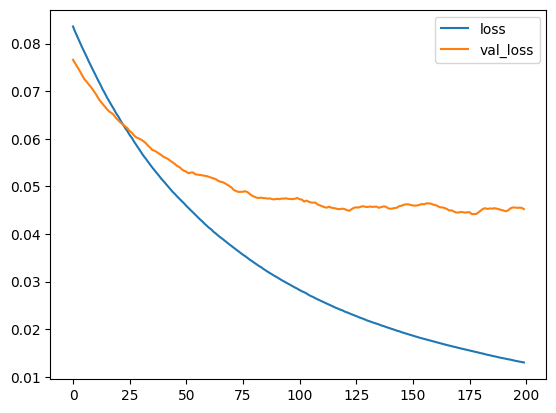

In [21]:
loss_df[['loss','val_loss']].plot()

<Axes: >

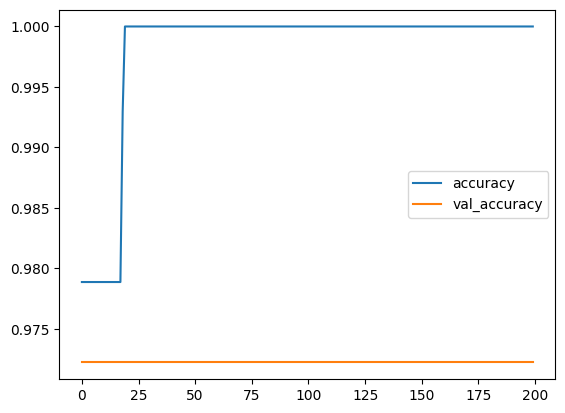

In [22]:
loss_df[['accuracy','val_accuracy']].plot()

In [30]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)
accuracy_score(y_test, y_pred)

2/2 [==============================] - 0s 4ms/step


0.9722222222222222

In [26]:
y_test.shape, y_pred.shape

((36,), (36, 3))

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

